In [2]:
#Import Library
import numpy as np
import pandas as pd
import sklearn

In [3]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [126]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df=pd.DataFrame(df_train)
df

Type                                 Name  Age  Breed1  Breed2  Gender  \
0         2                               Nibble    3     299       0       1   
1         2                          No Name Yet    1     265       0       1   
2         1                               Brisco    1     307       0       1   
3         1                                 Miko    4     307       0       2   
4         1                               Hunter    1     307       0       1   
5         2                                  NaN    3     266       0       2   
6         2                                BULAT   12     264     264       1   
7         1              Siu Pak & Her 6 Puppies    0     307       0       2   
8         2                                  NaN    2     265       0       2   
9         2                                Kitty   12     265       0       2   
10        1                                 Bear    2     307       0       1   
11        2                                 Kali    3     264       0       2   
12        1                               Peanut    2     307       0       1   
13        2              2 Mths Old Cute Kitties    2     265       0       3   
14        1                             Lost Dog    3     307       0       2   
15        1                                  Max   78     218     205       1   
16        2                              Brownie    6     266       0       2   
17        1                              Blackie    8     307     307       2   
18        1                               Beauty    2     307       0       2   
19        2                                  NaN    1     266       0       3   
20        1                               Godiva   12     307       0       2   
21        1                               Tigers    3     307       0       2   
22        2    Kenit, Kenot, Techit, Keyad, Owen    0     114       0       3   
23        1                                Donut   10     307     117       2   
24        2                              Cikenet    3     266       0       1   
25        2                             Garfield   36     285     251       1   
26        2                              No Name    2     285     265       1   
27        2                              No Name    1     266       0       2   
28        1                               Hunter   14     189       0       1   
29        2                               Pepper    1     266       0       2   
...     ...                                  ...  ...     ...     ...     ...   
14963     2                              Boceyyy    6     276       0       1   
14964     2                                Panbe   36     265       0       1   
14965     2                                Manis    2     266       0       2   
14966     2                               Belang    1     265       0       1   
14967     2                              Doremon   24     265       0       2   
14968     2                      Sentul Kittiens    2     266       0       3   
14969     2                               Tommie   10     266       0       1   
14970     1              KL Puppies For Adoption    2     307       0       2   
14971     2                                Omari    5     265       0       1   
14972     2                         Kofi (annan)    2     266       0       1   
14973     1                                 Zee4    2     307     307       2   
14974     1                              Ang Ang    2     307       0       1   
14975     1                               Wormmy   24     307       0       2   
14976     2                        Cici N Shelly   84     264     264       3   
14977     2                               Kimchi    3     254       0       2   
14978     1                                Ethio    4     307       0       2   
14979     1                             SambaBoy    6     307       0       1   
14980     1                           

### I have added Energetic Level for Dogs and Personality, Vocalize, and Playfullness for Cats

In [147]:
df_label = pd.read_csv('breed_labels.csv')

df_label

BreedID  Type                                      BreedName           Energetic Level    Personality  Vocalize  Playfullness
0          1     1                                  Affenpinscher          Regular Exercise            NaN       NaN           NaN
1          2     1                                   Afghan Hound                 Energetic            NaN       NaN           NaN
2          3     1                               Airedale Terrier          Regular Exercise            NaN       NaN           NaN
3          4     1                                         Akbash                      Calm            NaN       NaN           NaN
4          5     1                                          Akita                 Energetic            NaN       NaN           NaN
5          6     1                               Alaskan Malamute                 Energetic            NaN       NaN           NaN
6          7     1                               American Bulldog          Regular Exercise            NaN       NaN           NaN
7          8     1                            American Eskimo Dog                 Energetic            NaN       NaN           NaN
8          9     1                      American Hairless Terrier          Regular Exercise            NaN       NaN           NaN
9         10     1                 American Staffordshire Terrier          Regular Exercise            NaN       NaN           NaN
10        11     1                         American Water Spaniel          Regular Exercise            NaN       NaN           NaN
11        12     1                             Anatolian Shepherd          Regular Exercise            NaN       NaN           NaN
12        13     1                         Appenzell Mountain Dog  Needs a Lot of Activity             NaN       NaN           NaN
13        14     1              Australian Cattle Dog/Blue Heeler                 Energetic            NaN       NaN           NaN
14        15     1                              Australian Kelpie                 Energetic            NaN       NaN           NaN
15        16     1                            Australian Shepherd                 Energetic            NaN       NaN           NaN
16        17     1                             Australian Terrier                 Energetic            NaN       NaN           NaN
17        18     1                                        Basenji                 Energetic            NaN       NaN           NaN
18        19     1                                   Basset Hound                      Calm            NaN       NaN           NaN
19        20     1                                         Beagle                 Energetic            NaN       NaN           NaN
20        21     1                                 Bearded Collie          Regular Exercise            NaN       NaN           NaN
21        22     1                                      Beauceron  Needs a Lot of Activity             NaN       NaN           NaN
22        23     1                             Bedlington Terrier                 Energetic            NaN       NaN           NaN
23        24     1                  Belgian Shepherd Dog Sheepdog                 Energetic            NaN       NaN           NaN
24        25     1                     Belgian Shepherd Laekenois          Regular Exercise            NaN       NaN           NaN
25        26     1                      Belgian Shepherd Malinois                 Energetic            NaN       NaN           NaN
26        27     1                      Belgian Shepherd Tervuren                 Energetic            NaN       NaN           NaN
27        28     1                           Bernese Mountain Dog                 Energetic            NaN       NaN           NaN
28        29     1                                   Bichon Frise          Regular Exercise            NaN       NaN           NaN
29        30     1                        Black and Tan Coonhound          

### I have joined the training csv and breed_label csv based on BreedID for only Breed 1 in training data.

In [148]:
pd_train_new=pd.merge(df_train, df_label, left_on='Breed1', right_on='BreedID', how='left')
pd_train_new

Type_x                                      Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity  Fee  State                         RescuerID  VideoAmt                                        Description      PetID  PhotoAmt  AdoptionSpeed  BreedID  Type_y                       BreedName           Energetic Level    Personality  Vocalize  Playfullness
0           2                                    Nibble    3     299       0       1       1       7       0             1          1           2         2           2       1         1  100  41326  8480853f516546f6cf33aa88cd76c379         0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0              2    299.0     2.0                           Tabby                       NaN          Other       9.0           9.0
1           2                               No Name Yet    1     265       0       1       1       2       0             2          2           3         3           3       1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0  I just found it alone yesterday near my apartm...  6296e909a       2.0              0    265.0     2.0            Domestic Medium Hair                       NaN          Other       9.0           9.0
2           1                                    Brisco    1     307       0       1       2       7       0             2          2           1         1           2       1         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0  Their pregnant mother was dumped by her irresp...  3422e4906       7.0              3    307.0     1.0                     Mixed Breed                      N.A.            NaN       NaN           NaN
3           1                                      Miko    4     307       0       2       1       2       0             2          1           1         1           2       1         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0              2    307.0     1.0                     Mixed Breed                      N.A.            NaN       NaN           NaN
4           1                                    Hunter    1     307       0       1       1       0       0             2          1           2         2           2       1         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0  This handsome yet cute boy is up for adoption....  850a43f90       3.0              2    307.0     1.0                     Mixed Breed                      N.A.            NaN       NaN           NaN
5           2                                       NaN    3     266       0       2       5       6       0             2          1           2         2           2       1         1    0  41326  22fe332bf9c924d4718005891c63fbed         0  This is a stray kitten that came to my house. ...  d24c30b4b       2.0              2    266.0     2.0             Domestic Short Hair                       NaN          Other       9.0           9.0
6           2                                     BULAT   12     264     264       1       1       0       0             2          3           2         2           3       1         1  300  41326  1e0b5a458b5b77f5af581d57ebf570b3         0  anyone within the area of ipoh or taiping who ...  1caa6fcdb       3.0              1    264.0     2.0              Domestic Long Hair                       NaN          Other       9.0           9.0
7           1                   Siu Pak & Her 6 Puppies    0     307       0       2       1       2       7             2          1           2         2           2       1         6    0  41326  1fba5f6e5480946254590d48f9c5198d         0  Siu Pak just give birth on 13/6/10 to 6puppies...  97aa9eeac       9.0              3    307.0     1.0                     Mixed Breed                      N.A.            NaN       NaN           NaN
8           2       

In [149]:
#Rename the columns to avoid confusion
pd_train_new.rename(columns = {'BreedName':'BreedName B1'}, inplace = True)
pd_train_new.rename(columns = {'Energetic Level':'Energetic Level B1'}, inplace = True)
pd_train_new.rename(columns = {'Personality':'Personality B1'}, inplace = True)
pd_train_new.rename(columns = {'Vocalize':'Vocalize B1'}, inplace = True)
pd_train_new.rename(columns = {'Playfullness':'Playfulness B1'}, inplace = True)
pd_train_new

Type_x                                      Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity  Fee  State                         RescuerID  VideoAmt                                        Description      PetID  PhotoAmt  AdoptionSpeed  BreedID  Type_y                    BreedName B1        Energetic Level B1 Personality B1  Vocalize B1  Playfulness B1
0           2                                    Nibble    3     299       0       1       1       7       0             1          1           2         2           2       1         1  100  41326  8480853f516546f6cf33aa88cd76c379         0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0              2    299.0     2.0                           Tabby                       NaN          Other          9.0             9.0
1           2                               No Name Yet    1     265       0       1       1       2       0             2          2           3         3           3       1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0  I just found it alone yesterday near my apartm...  6296e909a       2.0              0    265.0     2.0            Domestic Medium Hair                       NaN          Other          9.0             9.0
2           1                                    Brisco    1     307       0       1       2       7       0             2          2           1         1           2       1         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0  Their pregnant mother was dumped by her irresp...  3422e4906       7.0              3    307.0     1.0                     Mixed Breed                      N.A.            NaN          NaN             NaN
3           1                                      Miko    4     307       0       2       1       2       0             2          1           1         1           2       1         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0              2    307.0     1.0                     Mixed Breed                      N.A.            NaN          NaN             NaN
4           1                                    Hunter    1     307       0       1       1       0       0             2          1           2         2           2       1         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0  This handsome yet cute boy is up for adoption....  850a43f90       3.0              2    307.0     1.0                     Mixed Breed                      N.A.            NaN          NaN             NaN
5           2                                       NaN    3     266       0       2       5       6       0             2          1           2         2           2       1         1    0  41326  22fe332bf9c924d4718005891c63fbed         0  This is a stray kitten that came to my house. ...  d24c30b4b       2.0              2    266.0     2.0             Domestic Short Hair                       NaN          Other          9.0             9.0
6           2                                     BULAT   12     264     264       1       1       0       0             2          3           2         2           3       1         1  300  41326  1e0b5a458b5b77f5af581d57ebf570b3         0  anyone within the area of ipoh or taiping who ...  1caa6fcdb       3.0              1    264.0     2.0              Domestic Long Hair                       NaN          Other          9.0             9.0
7           1                   Siu Pak & Her 6 Puppies    0     307       0       2       1       2       7             2          1           2         2           2       1         6    0  41326  1fba5f6e5480946254590d48f9c5198d         0  Siu Pak just give birth on 13/6/10 to 6puppies...  97aa9eeac       9.0              3    307.0     1.0                     Mixed Breed                      N.A.            NaN     

### Next, I have created the 'Mixed Breed' indicator. If Breed1 equals to 307, or if breed1 and breed2 are not the same, then it is a mixed breed.

In [150]:
pd_train_new['MixedBreed']=np.where((pd_train_new['Breed1']==307)|((pd_train_new['Breed1']!=pd_train_new['Breed2'])&(pd_train_new['Breed2']!=0)) , 'Yes', 'No')
pd_train_new

Type_x                                      Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity  Fee  State                         RescuerID  VideoAmt                                        Description      PetID  PhotoAmt  AdoptionSpeed  BreedID  Type_y                    BreedName B1        Energetic Level B1 Personality B1  Vocalize B1  Playfulness B1 MixedBreed
0           2                                    Nibble    3     299       0       1       1       7       0             1          1           2         2           2       1         1  100  41326  8480853f516546f6cf33aa88cd76c379         0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0              2    299.0     2.0                           Tabby                       NaN          Other          9.0             9.0         No
1           2                               No Name Yet    1     265       0       1       1       2       0             2          2           3         3           3       1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0  I just found it alone yesterday near my apartm...  6296e909a       2.0              0    265.0     2.0            Domestic Medium Hair                       NaN          Other          9.0             9.0         No
2           1                                    Brisco    1     307       0       1       2       7       0             2          2           1         1           2       1         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0  Their pregnant mother was dumped by her irresp...  3422e4906       7.0              3    307.0     1.0                     Mixed Breed                      N.A.            NaN          NaN             NaN        Yes
3           1                                      Miko    4     307       0       2       1       2       0             2          1           1         1           2       1         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0              2    307.0     1.0                     Mixed Breed                      N.A.            NaN          NaN             NaN        Yes
4           1                                    Hunter    1     307       0       1       1       0       0             2          1           2         2           2       1         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0  This handsome yet cute boy is up for adoption....  850a43f90       3.0              2    307.0     1.0                     Mixed Breed                      N.A.            NaN          NaN             NaN        Yes
5           2                                       NaN    3     266       0       2       5       6       0             2          1           2         2           2       1         1    0  41326  22fe332bf9c924d4718005891c63fbed         0  This is a stray kitten that came to my house. ...  d24c30b4b       2.0              2    266.0     2.0             Domestic Short Hair                       NaN          Other          9.0             9.0         No
6           2                                     BULAT   12     264     264       1       1       0       0             2          3           2         2           3       1         1  300  41326  1e0b5a458b5b77f5af581d57ebf570b3         0  anyone within the area of ipoh or taiping who ...  1caa6fcdb       3.0              1    264.0     2.0              Domestic Long Hair                       NaN          Other          9.0             9.0         No
7           1                   Siu Pak & Her 6 Puppies    0     307       0       2       1       2       7             2          1           2         2           2       1         6    0  41326  1fba5f6e5480946254590d48f9c5198d         0  Siu Pak just give birth on 13/6/10 to 6puppies...  97aa9eeac       9.0              3    307

### Next, I have created the 'Fee Flag' indicator. If the fee is larger than 0, then it is 'Yes', else it is 'No'.

In [151]:
pd_train_new['Fee Flag']=np.where(pd_train_new['Fee']>0,'Yes', 'No')

### Next, I have created 'Adopted Flag' indicator. If the Adoption Speed is equal to 4, then it is not adopted, otherwise it is 'Yes'.

In [152]:
pd_train_new['Adopted Flag']=np.where(pd_train_new['AdoptionSpeed']==4,'No', 'Yes')

### Here's a summary of null values for each variable in our dataframe.

In [153]:
pd_train_new.isnull().sum()

Type_x                   0
Name                  1257
Age                      0
Breed1                   0
Breed2                   0
Gender                   0
Color1                   0
Color2                   0
Color3                   0
MaturitySize             0
FurLength                0
Vaccinated               0
Dewormed                 0
Sterilized               0
Health                   0
Quantity                 0
Fee                      0
State                    0
RescuerID                0
VideoAmt                 0
Description             12
PetID                    0
PhotoAmt                 0
AdoptionSpeed            0
BreedID                  5
Type_y                   5
BreedName B1             5
Energetic Level B1    6857
Personality B1        8145
Vocalize B1           8145
Playfulness B1        8145
MixedBreed               0
Fee Flag                 0
Adopted Flag             0
dtype: int64

In [122]:
print(df.describe())

               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086    

### This is the correlation table for all original variables in training cvs.

In [9]:
df.corr()

Type       Age    Breed1    Breed2    Gender    Color1  \
Type           1.000000 -0.147162  0.057724 -0.043568  0.060843  0.097680   
Age           -0.147162  1.000000 -0.314346 -0.041010 -0.123423  0.090378   
Breed1         0.057724 -0.314346  1.000000 -0.157053  0.071321 -0.035510   
Breed2        -0.043568 -0.041010 -0.157053  1.000000  0.056907 -0.020324   
Gender         0.060843 -0.123423  0.071321  0.056907  1.000000 -0.115351   
Color1         0.097680  0.090378 -0.035510 -0.020324 -0.115351  1.000000   
Color2         0.246333 -0.039427 -0.007081  0.003015  0.026507 -0.113290   
Color3         0.201693 -0.053546 -0.000682  0.035679  0.259309 -0.282897   
MaturitySize  -0.171811  0.093673 -0.010507  0.049879 -0.091819 -0.029468   
FurLength      0.003036  0.153092 -0.108059  0.106220 -0.030404  0.066967   
Vaccinated     0.102907 -0.136061  0.046518  0.005638  0.078702 -0.017475   
Dewormed       0.025508 -0.053360  0.013216 -0.009817  0.091431 -0.019318   
Sterilized     0.006737 -0.189450  0.052698 -0.005989  0.040645 -0.037050   
Health        -0.006864  0.103215 -0.034893 -0.029285 -0.045177  0.024410   
Quantity       0.036423 -0.113076  0.090194  0.038125  0.494489 -0.116688   
Fee           -0.042134  0.089168 -0.189526  0.013508 -0.050491  0.054180   
State          0.124549  0.024523 -0.026832 -0.037993  0.002564  0.024012   
VideoAmt      -0.005967 -0.015969  0.020626  0.001569  0.016816 -0.006435   
PhotoAmt       0.049368 -0.084778  0.043395  0.045953  0.098435 -0.041323   
AdoptionSpeed -0.091240  0.100510  0.107834 -0.018642  0.057622 -0.044192   

                 Color2    Color3  MaturitySize  FurLength  Vaccinated  \
Type           0.246333  0.201693     -0.171811   0.003036    0.102907   
Age           -0.039427 -0.053546      0.093673   0.153092   -0.136061   
Breed1        -0.007081 -0.000682     -0.010507  -0.108059    0.046518   
Breed2         0.003015  0.035679      0.049879   0.106220    0.005638   
Gender         0.026507  0.259309     -0.091819  -0.030404    0.078702   
Color1        -0.113290 -0.282897     -0.029468   0.066967   -0.017475   
Color2         1.000000  0.088742     -0.065155  -0.008764    0.026193   
Color3         0.088742  1.000000     -0.051730   0.013581    0.054053   
MaturitySize  -0.065155 -0.051730      1.000000   0.095142   -0.087722   
FurLength     -0.008764  0.013581      0.095142   1.000000   -0.006010   
Vaccinated     0.026193  0.054053     -0.087722  -0.006010    1.000000   
Dewormed       0.005812  0.048617     -0.067352   0.016463    0.722596   
Sterilized     0.007370  0.038899     -0.066321   0.032092    0.471204   
Health        -0.004307 -0.024782     -0.012957   0.028096    0.078893   
Quantity       0.019876  0.272548     -0.042832  -0.038388    0.125287   
Fee           -0.017308 -0.019839      0.041144   0.159693   -0.121868   
State          0.026944  0.010554     -0.062584  -0.029317    0.032737   
VideoAmt       0.023983  0.019526      0.017032  -0.014740   -0.032685   
PhotoAmt       0.059113  0.103662      0.015593  -0.031557   -0.052719   
AdoptionSpeed -0.038579 -0.007014      0.045653  -0.091337   -0.059043   

               Dewormed  Sterilized    Health  Quantity       Fee     State  \
Type           0.025508    0.006737 -0.006864  0.036423 -0.042134  0.124549   
Age           -0.053360   -0.189450  0.103215 -0.113076  0.089168  0.024523   
Breed1         0.013216    0.052698 -0.034893  0.090194 -0.189526 -0.026832   
Breed2        -0.009817   -0.005989 -0.029285  0.038125  0.013508 -0.037993   
Gender         0.091431    0.040645 -0.045177  0.494489 -0.050491  0.002564   
Color1        -0.019318   -0.037050  0.024410 -0.116688  0.054180  0.024012   
Color2         0.005812    0.007370 -0.004307  0.019876 -0.017308  0.026944   
Color3         0.048617    0.038899 -0.024782  0.272548 -0.019839  0.010554   
MaturitySize  -0.067352   -0.066321 -0.012957 -0.042832  0.041144 -0.062584   
FurLength      0.016463    0.032092  0.028096 -0.038388 

### This is the correlation table for all new variables we have.

In [154]:
pd_train_new.corr()

Type_x       Age    Breed1    Breed2    Gender    Color1    Color2    Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized    Health  Quantity       Fee     State  VideoAmt  PhotoAmt  AdoptionSpeed   BreedID    Type_y  Vocalize B1  Playfulness B1
Type_x          1.000000 -0.147162  0.057724 -0.043568  0.060843  0.097680  0.246333  0.201693     -0.171811   0.003036    0.102907  0.025508    0.006737 -0.006864  0.036423 -0.042134  0.124549 -0.005967  0.049368      -0.091240  0.057157  0.998388          NaN             NaN
Age            -0.147162  1.000000 -0.314346 -0.041010 -0.123423  0.090378 -0.039427 -0.053546      0.093673   0.153092   -0.136061 -0.053360   -0.189450  0.103215 -0.113076  0.089168  0.024523 -0.015969 -0.084778       0.100510 -0.315002 -0.146660    -0.115895       -0.122176
Breed1          0.057724 -0.314346  1.000000 -0.157053  0.071321 -0.035510 -0.007081 -0.000682     -0.010507  -0.108059    0.046518  0.013216    0.052698 -0.034893  0.090194 -0.189526 -0.026832  0.020626  0.043395       0.107834  1.000000  0.059991    -0.263377       -0.161556
Breed2         -0.043568 -0.041010 -0.157053  1.000000  0.056907 -0.020324  0.003015  0.035679      0.049879   0.106220    0.005638 -0.009817   -0.005989 -0.029285  0.038125  0.013508 -0.037993  0.001569  0.045953      -0.018642 -0.155842 -0.042736    -0.229552       -0.262302
Gender          0.060843 -0.123423  0.071321  0.056907  1.000000 -0.115351  0.026507  0.259309     -0.091819  -0.030404    0.078702  0.091431    0.040645 -0.045177  0.494489 -0.050491  0.002564  0.016816  0.098435       0.057622  0.072052  0.060596     0.043495        0.028737
Color1          0.097680  0.090378 -0.035510 -0.020324 -0.115351  1.000000 -0.113290 -0.282897     -0.029468   0.066967   -0.017475 -0.019318   -0.037050  0.024410 -0.116688  0.054180  0.024012 -0.006435 -0.041323      -0.044192 -0.036164  0.097988    -0.057368       -0.087750
Color2          0.246333 -0.039427 -0.007081  0.003015  0.026507 -0.113290  1.000000  0.088742     -0.065155  -0.008764    0.026193  0.005812    0.007370 -0.004307  0.019876 -0.017308  0.026944  0.023983  0.059113      -0.038579 -0.007332  0.245686     0.023290        0.047415
Color3          0.201693 -0.053546 -0.000682  0.035679  0.259309 -0.282897  0.088742  1.000000     -0.051730   0.013581    0.054053  0.048617    0.038899 -0.024782  0.272548 -0.019839  0.010554  0.019526  0.103662      -0.007014 -0.000230  0.201196     0.035878        0.039871
MaturitySize   -0.171811  0.093673 -0.010507  0.049879 -0.091819 -0.029468 -0.065155 -0.051730      1.000000   0.095142   -0.087722 -0.067352   -0.066321 -0.012957 -0.042832  0.041144 -0.062584  0.017032  0.015593       0.045653 -0.011251 -0.171253    -0.092719       -0.088205
FurLength       0.003036  0.153092 -0.108059  0.106220 -0.030404  0.066967 -0.008764  0.013581      0.095142   1.000000   -0.006010  0.016463    0.032092  0.028096 -0.038388  0.159693 -0.029317 -0.014740 -0.031557      -0.091337 -0.109085  0.002918    -0.217837       -0.234346
Vaccinated      0.102907 -0.136061  0.046518  0.005638  0.078702 -0.017475  0.026193  0.054053     -0.087722  -0.006010    1.000000  0.722596    0.471204  0.078893  0.125287 -0.121868  0.032737 -0.032685 -0.052719      -0.059043  0.046384  0.101985     0.014299        0.004250
Dewormed        0.025508 -0.053360  0.013216 -0.009817  0.091431 -0.019318  0.005812  0.048617     -0.067352   0.016463    0.722596  1.000000    0.426256  0.072188  0.141355 -0.105978 -0.001310 -0.036961 -0.099026      -0.013210  0.012923  0.024729     0.010795        0.002775
Sterilized      0.006737 -0.189450  0.052698 -0.005989  0.040645 -0.037050  0.007370  0.038899     -0.066321   0.032092    0.471204  0.426256    1.000000  0.057916  0.101919 -0.063790  0.009951 -0.018720 -0.062067      -0.083447  0.053094  0.006049    -0.011227       -0.004017
Health         -0.006864  0.103215 -0.034893 -0.029285 -0.045177  0.024410 -0.004307 -0.024782     -0.012957   0.028096    0.0

In [155]:
ADS_Type=df.groupby(["AdoptionSpeed","Type" ]).size()
ADS_Type

AdoptionSpeed  Type
0              1        170
               2        240
1              1       1435
               2       1655
2              1       2164
               2       1873
3              1       1949
               2       1310
4              1       2414
               2       1783
dtype: int64

In [156]:
Freq_Type=df.groupby(["Type" ]).size()
Freq_Type

Type
1    8132
2    6861
dtype: int64

In [11]:
ADS_Age=df.groupby(["Age","AdoptionSpeed" ]).size()
ADS_Age

Age  AdoptionSpeed
0    0                  10
     1                  50
     2                  44
     3                  39
     4                  36
1    0                  54
     1                 643
     2                 754
     3                 511
     4                 342
2    0                 115
     1                 865
     2                1120
     3                 783
     4                 620
3    0                  44
     1                 408
     2                 586
     3                 458
     4                 470
4    0                  24
     1                 211
     2                 265
     3                 260
     4                 349
5    0                   7
     1                 100
     2                 157
     3                 135
     4                 196
                      ... 
108  2                   3
     3                   4
     4                  11
112  0                   1
     2                   1
117  1   

In [30]:
Freq_Age=df.groupby(["Age"]).size()
Freq_Age

Age
0       179
1      2304
2      3503
3      1966
4      1109
5       595
6       558
7       281
8       309
9       184
10      162
11       94
12      967
13       40
14       76
15       79
16       50
17       67
18      165
19       26
20       32
21       28
22       19
23        8
24      651
25       10
26       13
27       17
28       13
29       25
       ... 
81        1
82        1
84      102
85        1
86        1
87        1
88        1
89        2
91        1
92        2
95        1
96       46
100       1
102       1
108      21
112       2
117       1
120      33
122       1
123       1
132       8
135       1
144       4
147       1
156       1
168       1
180       2
212       3
238       1
255       2
Length: 106, dtype: int64

In [12]:
ADS_Gender=df.groupby(["AdoptionSpeed","Gender" ]).size()
ADS_Gender

AdoptionSpeed  Gender
0              1          160
               2          204
               3           46
1              1         1283
               2         1366
               3          441
2              1         1578
               2         1911
               3          548
3              1         1109
               2         1671
               3          479
4              1         1406
               2         2125
               3          666
dtype: int64

In [31]:
Freq_Gender=df.groupby(["Gender" ]).size()
Freq_Gender

Gender
1    5536
2    7277
3    2180
dtype: int64

In [13]:
ADS_MatureSize=df.groupby(["AdoptionSpeed","MaturitySize" ]).size()
ADS_MatureSize

AdoptionSpeed  MaturitySize
0              1                139
               2                226
               3                 43
               4                  2
1              1                870
               2               1909
               3                304
               4                  7
2              1                884
               2               2837
               3                305
               4                 11
3              1                641
               2               2360
               3                248
               4                 10
4              1                861
               2               2973
               3                360
               4                  3
dtype: int64

In [32]:
Freq_MatureSize=df.groupby(["MaturitySize" ]).size()
Freq_MatureSize

MaturitySize
1     3395
2    10305
3     1260
4       33
dtype: int64

In [14]:
ADS_FurLength=df.groupby(["AdoptionSpeed","FurLength" ]).size()
ADS_FurLength

AdoptionSpeed  FurLength
0              1             194
               2             160
               3              56
1              1            1649
               2            1187
               3             254
2              1            2372
               2            1444
               3             221
3              1            1994
               2            1111
               3             154
4              1            2599
               2            1459
               3             139
dtype: int64

In [33]:
Freq_FurLength=df.groupby(["FurLength" ]).size()
Freq_FurLength

FurLength
1    8808
2    5361
3     824
dtype: int64

In [15]:
ADS_Vaccinated=df.groupby(["AdoptionSpeed","Vaccinated" ]).size()
ADS_Vaccinated

AdoptionSpeed  Vaccinated
0              1              146
               2              206
               3               58
1              1              965
               2             1777
               3              348
2              1             1473
               2             2112
               3              452
3              1             1419
               2             1459
               3              381
4              1             1895
               2             1673
               3              629
dtype: int64

In [35]:
Freq_Vaccinated=df.groupby(["Vaccinated" ]).size()
Freq_Vaccinated

Vaccinated
1    5898
2    7227
3    1868
dtype: int64

In [16]:
ADS_Dewormed=df.groupby(["AdoptionSpeed","Dewormed" ]).size()
ADS_Dewormed

AdoptionSpeed  Dewormed
0              1            205
               2            146
               3             59
1              1           1572
               2           1188
               3            330
2              1           2273
               2           1347
               3            417
3              1           1988
               2            914
               3            357
4              1           2359
               2           1220
               3            618
dtype: int64

In [36]:
Freq_Dewormed=df.groupby(["Dewormed" ]).size()
Freq_Dewormed

Dewormed
1    8397
2    4815
3    1781
dtype: int64

In [17]:
ADS_Sterilized=df.groupby(["AdoptionSpeed","Sterilized" ]).size()
ADS_Sterilized

AdoptionSpeed  Sterilized
0              1               70
               2              270
               3               70
1              1              364
               2             2378
               3              348
2              1              656
               2             3022
               3              359
3              1              720
               2             2251
               3              288
4              1             1291
               2             2156
               3              750
dtype: int64

In [37]:
Freq_Sterilized=df.groupby(["Sterilized" ]).size()
Freq_Sterilized

Sterilized
1     3101
2    10077
3     1815
dtype: int64

In [18]:
ADS_Health=df.groupby(["AdoptionSpeed","Health" ]).size()
ADS_Health

AdoptionSpeed  Health
0              1          392
               2           17
               3            1
1              1         2999
               2           89
               3            2
2              1         3925
               2          106
               3            6
3              1         3150
               2           98
               3           11
4              1         4012
               2          171
               3           14
dtype: int64

In [38]:
Freq_Health=df.groupby(["Health" ]).size()
Freq_Health

Health
1    14478
2      481
3       34
dtype: int64

In [19]:
ADS_State=df.groupby(["AdoptionSpeed","State" ]).size()
ADS_State

AdoptionSpeed  State
0              41324       4
               41325       3
               41326     246
               41327       8
               41330       3
               41332       4
               41335       3
               41336      23
               41342       1
               41345       1
               41367       2
               41401     112
1              41324      18
               41325      14
               41326    1877
               41327     122
               41330      48
               41332      36
               41335      29
               41336     113
               41342       1
               41345       6
               41361       9
               41367       3
               41401     814
2              41324      23
               41325      34
               41326    2435
               41327     216
               41330     111
                        ... 
               41401     996
               41415       1
3              41324  

In [39]:
Freq_State=df.groupby(["State" ]).size()
Freq_State

State
41324     137
41325     110
41326    8714
41327     843
41330     420
41332     253
41335      85
41336     507
41342      13
41345      22
41361      26
41367      15
41401    3845
41415       3
dtype: int64

### This is a table where we count the Breed in our training set. We can see most of the breed are Mixed Breed. Please note this table still has both cats and dogs.

In [157]:
Freq_BreedName=pd_train_new.groupby(["BreedName B1"]).size().to_frame('Count')
Freq_BreedName.sort_values(by='Count', ascending=False)

Count
BreedName B1                                        
Mixed Breed                                     5927
Domestic Short Hair                             3634
Domestic Medium Hair                            1258
Tabby                                            342
Domestic Long Hair                               296
Siamese                                          264
Persian                                          221
Labrador Retriever                               205
Shih Tzu                                         190
Poodle                                           167
Terrier                                          162
Golden Retriever                                 151
Calico                                           105
German Shepherd Dog                               98
American Shorthair                                94
Beagle                                            90
Spitz                                             89
Rottweiler                                        88
Oriental Short Hair                               73
Bengal                                            71
Schnauzer                                         69
Miniature Pinscher                                67
Jack Russell Terrier                              64
Doberman Pinscher                                 62
Tuxedo                                            56
Tortoiseshell                                     42
Cocker Spaniel                                    41
Dalmatian                                         39
Chihuahua                                         37
Husky                                             37
Maine Coon                                        34
British Shorthair                                 34
Dachshund                                         28
Abyssinian                                        28
Border Collie                                     26
Belgian Shepherd Malinois                         26
Russian Blue                                      26
Siberian Husky                                    25
Silky Terrier                                     24
Pit Bull Terrier                                  23
Burmese                                           23
Pomeranian                                        22
Tiger                                             21
Pug                                               21
Maltese                                           19
Bobtail                                           19
Pekingese                                         18
American Curl                                     17
Oriental Long Hair                                17
Ragdoll                                           16
Bull Terrier                                      16
Shar Pei                                          15
Corgi                                             15
Bombay                                            14
Singapura                                         13
Yellow Labrador Retriever                         12
Bullmastiff                                       12
Collie                                            12
Hound                                             11
Boxer                                             10
Basset Hound                                       9
English Cocker Spaniel                             9
Australian Kelpie                                  9
Black Labrador Retriever                           8
Turkish Van                                        8
Manx                                               8
Turkish Angora                                     7
Javanese                                           7
Oriental Tabby                                     7
West Highland White Terrier Westie                 7
Great Dane                                         6
Shepherd                                           6
Japanese Bobtail                                   6
German Pinscher                                    6
Basenji            

### For further analysis about energetic level, vocalize, personality, and playfulness. Let's split the dataset to Dogs only and Cats only.

In [158]:
pd_train_new_dog=pd_train_new.loc[df['Type'] == 1]
pd_train_new_dog

Type_x                                      Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity  Fee  State                         RescuerID  VideoAmt                                        Description      PetID  PhotoAmt  AdoptionSpeed  BreedID  Type_y                                   BreedName B1        Energetic Level B1 Personality B1  Vocalize B1  Playfulness B1 MixedBreed Fee Flag Adopted Flag
2           1                                    Brisco    1     307       0       1       2       7       0             2          2           1         1           2       1         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0  Their pregnant mother was dumped by her irresp...  3422e4906       7.0              3    307.0     1.0                                    Mixed Breed                      N.A.            NaN          NaN             NaN        Yes       No          Yes
3           1                                      Miko    4     307       0       2       1       2       0             2          1           1         1           2       1         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0              2    307.0     1.0                                    Mixed Breed                      N.A.            NaN          NaN             NaN        Yes      Yes          Yes
4           1                                    Hunter    1     307       0       1       1       0       0             2          1           2         2           2       1         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0  This handsome yet cute boy is up for adoption....  850a43f90       3.0              2    307.0     1.0                                    Mixed Breed                      N.A.            NaN          NaN             NaN        Yes       No          Yes
7           1                   Siu Pak & Her 6 Puppies    0     307       0       2       1       2       7             2          1           2         2           2       1         6    0  41326  1fba5f6e5480946254590d48f9c5198d         0  Siu Pak just give birth on 13/6/10 to 6puppies...  97aa9eeac       9.0              3    307.0     1.0                                    Mixed Breed                      N.A.            NaN          NaN             NaN        Yes       No          Yes
10          1                                      Bear    2     307       0       1       1       2       7             2          1           2         1           2       1         1    0  41401  9238e4f44c71a75282e62f7136c6b240         0  For serious adopter, please do sms or call for...  8b693ca84       7.0              1    307.0     1.0                                    Mixed Breed                      N.A.            NaN          NaN             NaN        Yes       No          Yes
12          1                                    Peanut    2     307       0       1       2       5       6             2          3           1         1           2       1         1    0  41326  db784cbcf321e1d8856b312638b94113         0  Peanut was an abused puppy until he was rescue...  aaedd873d       1.0              2    307.0     1.0                                    Mixed Breed                      N.A.            NaN          NaN             NaN        Yes       No          Yes
14          1                                  Lost Dog    3     307       0       2       2       5       7             2          2           3         3           3       1         1    0  41401  b609c40c6c840db208b149a19b856f86         0  Lost Dog Found (Bandar Menjalara, Kepong／Taman...  c02be41e6       2.0              2    307.0     1.0                                    Mixed Breed                      N.A.            NaN          NaN             NaN        Yes       No          Yes
15          1                          

In [159]:
pd_train_new_cat=pd_train_new.loc[df['Type'] == 2]
pd_train_new_cat

Type_x                                      Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity  Fee  State                         RescuerID  VideoAmt                                        Description      PetID  PhotoAmt  AdoptionSpeed  BreedID  Type_y          BreedName B1 Energetic Level B1 Personality B1  Vocalize B1  Playfulness B1 MixedBreed Fee Flag Adopted Flag
0           2                                    Nibble    3     299       0       1       1       7       0             1          1           2         2           2       1         1  100  41326  8480853f516546f6cf33aa88cd76c379         0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0              2    299.0     2.0                 Tabby                NaN          Other          9.0             9.0         No      Yes          Yes
1           2                               No Name Yet    1     265       0       1       1       2       0             2          2           3         3           3       1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0  I just found it alone yesterday near my apartm...  6296e909a       2.0              0    265.0     2.0  Domestic Medium Hair                NaN          Other          9.0             9.0         No       No          Yes
5           2                                       NaN    3     266       0       2       5       6       0             2          1           2         2           2       1         1    0  41326  22fe332bf9c924d4718005891c63fbed         0  This is a stray kitten that came to my house. ...  d24c30b4b       2.0              2    266.0     2.0   Domestic Short Hair                NaN          Other          9.0             9.0         No       No          Yes
6           2                                     BULAT   12     264     264       1       1       0       0             2          3           2         2           3       1         1  300  41326  1e0b5a458b5b77f5af581d57ebf570b3         0  anyone within the area of ipoh or taiping who ...  1caa6fcdb       3.0              1    264.0     2.0    Domestic Long Hair                NaN          Other          9.0             9.0         No      Yes          Yes
8           2                                       NaN    2     265       0       2       6       0       0             2          2           2         2           2       1         1    0  41326  d8af7afece71334473575c9f70daf00d         0  healthy and active, feisty kitten found in nei...  c06d167ca       6.0              1    265.0     2.0  Domestic Medium Hair                NaN          Other          9.0             9.0         No       No          Yes
9           2                                     Kitty   12     265       0       2       1       7       0             2          2           3         3           3       1         1    0  41326  1f3f36e4b18e94855b3e88af0852fdc4         0  Very manja and gentle stray cat found, we woul...  7a0942d61       2.0              4    265.0     2.0  Domestic Medium Hair                NaN          Other          9.0             9.0         No       No           No
11          2                                      Kali    3     264       0       2       1       2       5             3          3           1         1           2       1         1   50  41326  a9caef3f98e67bfac9093cca79e20b93         0  Kali is a super playful kitten who is on the g...  8e76c8e39       2.0              1    264.0     2.0    Domestic Long Hair                NaN          Other          9.0             9.0         No      Yes          Yes
13          2                   2 Mths Old Cute Kitties    2     265       0       3       1       6       7             1          2           2         2           3       1         7    0  41326  2c118b2a1d1b4cf1f735089c7c0a07c0         0  Hi Pet Lovers! This is my first posting and I ...  4

### Let's look at the table below(Dogs only), we are able to see the top 3 breed in our training set are Labrador Retriever, Shih Tzu and Poodle (besides the Mixed Breed).

In [160]:
Freq_EnergetyLvl=pd_train_new_dog.groupby(["Energetic Level B1","BreedName B1"]).size().to_frame('Count')
Freq_EnergetyLvl.sort_values(by='Count', ascending=False)

Count
Energetic Level B1       BreedName B1                             
N.A.                     Mixed Breed                          5923
Needs a Lot of Activity  Labrador Retriever                    205
Regular Exercise         Shih Tzu                              189
Energetic                Poodle                                167
Other                    Terrier                               161
Needs a Lot of Activity  Golden Retriever                      151
Regular Exercise         German Shepherd Dog                    98
Energetic                Beagle                                 90
Other                    Spitz                                  89
Regular Exercise         Rottweiler                             88
Needs a Lot of Activity  Schnauzer                              69
Regular Exercise         Miniature Pinscher                     67
Needs a Lot of Activity  Jack Russell Terrier                   64
                         Doberman Pinscher                      62
Regular Exercise         Cocker Spaniel                         41
Energetic                Dalmatian                              39
                         Husky                                  37
Regular Exercise         Chihuahua                              37
                         Dachshund                              28
Needs a Lot of Activity  Border Collie                          26
Energetic                Belgian Shepherd Malinois              26
                         Siberian Husky                         25
Regular Exercise         Silky Terrier                          24
Energetic                Pit Bull Terrier                       23
Regular Exercise         Pomeranian                             22
                         Pug                                    21
                         Maltese                                19
Calm                     Pekingese                              18
Energetic                Bull Terrier                           16
Calm                     Shar Pei                               15
Energetic                Corgi                                  15
Needs a Lot of Activity  Yellow Labrador Retriever              12
Energetic                Bullmastiff                            12
Regular Exercise         Collie                                 11
Needs a Lot of Activity  Hound                                  11
Energetic                Boxer                                  10
Calm                     Basset Hound                            9
Regular Exercise         English Cocker Spaniel                  9
Needs a Lot of Activity  Black Labrador Retriever                8
Energetic                Australian Kelpie                       8
Regular Exercise         West Highland White Terrier Westie      7
Other                    Shepherd                                6
Energetic                Great Dane                              6
                         Basenji                                 6
                         Australian Terrier                      6
Needs a Lot of Activity  German Pinscher                         6
Regular Exercise         Boston Terrier                          5
                         English Bulldog                         5
                         Rat Terrier                             5
                         Saint Bernard                           5
                         Yorkshire Terrier Yorkie                5
                         German Spitz                            4
Needs a Lot of Activity  Retriever                               4
Calm                     French Bulldog                          4
Regular Exercise         Mastiff                                 4
Needs a Lot of Activity  Flat-coated Retriever                   3
                         Black Mouth Cur                         3
Regular Exercise         Chow Chow                               3
Energetic                Toy Fox Terrier 

### This is the Enegertic Level group by Adoption Speed. We could see most of the mixed breed are never adopted.(2027)


In [161]:
ADS_EnergetyLvl=pd_train_new_dog.groupby(["Energetic Level B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_EnergetyLvl.sort_values(by='Count', ascending=False)

Count
Energetic Level B1       AdoptionSpeed       
N.A.                     4               2027
                         2               1575
                         3               1381
                         1                859
Regular Exercise         1                224
                         2                213
Needs a Lot of Activity  3                189
Regular Exercise         3                168
Needs a Lot of Activity  2                166
                         1                148
Energetic                1                147
                         2                122
                         3                113
Needs a Lot of Activity  4                107
Regular Exercise         4                106
Energetic                4                105
Other                    3                 83
N.A.                     0                 81
Other                    2                 72
                         4                 60
                         1                 42
Energetic                0                 31
Regular Exercise         0                 28
Needs a Lot of Activity  0                 25
Calm                     2                 15
                         1                 14
                         3                 12
                         4                  6
Other                    0                  4
Calm                     0                  1

### Next, we look at the cat's personality. Do note, that Breed Name like domestic *** are kind of mixed breed or not purebreed cats.

In [162]:
Freq_Personality=pd_train_new_cat.groupby(["Personality B1","BreedName B1"]).size().to_frame('Count')
Freq_Personality.sort_values(by='Count', ascending=False)

Count
Personality B1 BreedName B1                                
Other          Domestic Short Hair                     3634
               Domestic Medium Hair                    1258
               Tabby                                    342
               Domestic Long Hair                       296
Affectionate   Siamese                                  264
               Persian                                  221
Other          Calico                                   105
Even Tempered  American Shorthair                        94
Affectionate   Oriental Short Hair                       73
Other          Bengal                                    71
               Tuxedo                                    56
               Tortoiseshell                             42
Active         Maine Coon                                34
Quiet          British Shorthair                         34
Active         Abyssinian                                28
Quiet          Russian Blue                              26
Affectionate   Burmese                                   23
Other          Tiger                                     21
Intelligent    Bobtail                                   19
Affectionate   Oriental Long Hair                        17
Energetic      American Curl                             17
Affectionate   Ragdoll                                   16
               Bombay                                    14
               Singapura                                 13
Sweet          Turkish Van                                8
Quiet          Manx                                       8
Busy           Turkish Angora                             7
Affectionate   Javanese                                   7
Other          Oriental Tabby                             7
Quiet          Exotic Shorthair                           6
Intelligent    Japanese Bobtail                           6
Affectionate   Korat                                      5
Active         Norwegian Forest Cat                       5
               Somali                                     5
Other          Snowshoe                                   5
Vocal          Tonkinese                                  5
Other          Burmilla                                   5
Even Tempered  American Wirehair                          5
Active         Balinese                                   4
Other          Silver                                     4
               Dilute Calico                              3
Active         Egyptian Mau                               3
Other          Nebelung                                   3
Powerful       Siberian                                   3
Affectionate   Himalayan                                  3
Other          Dilute Tortoiseshell                       3
Active         Applehead Siamese                          2
               Ocicat                                     2
Other          Extra-Toes Cat (Hemingway Polydactyl)      2
Affectionate   Havana                                     2
Other          Cymric                                     2
Affectionate   Birman                                     2
               Chartreux                                  2
Other          Torbie                                     1
               Pixie-Bob                                  1
               Chausie                                    1
Affectionate   Ragamuffin                                 1
               Scottish Fold                              1
Active         Sphynx (hairless cat)                      1

### Unlike mixed breed dogs, there are more non-purebreed cats are adopted faster which could indicates that people might not that care about purebreed or mixed breed for cats.

In [163]:
ADS_Personality=pd_train_new_cat.groupby(["Personality B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Personality.sort_values(by='Count', ascending=False)

Count
Personality B1 AdoptionSpeed       
Other          2               1621
               4               1539
               1               1368
               3               1153
Affectionate   1                207
Other          0                181
Affectionate   2                167
               4                145
               3                102
               0                 43
Even Tempered  4                 38
Active         1                 25
Quiet          2                 24
               1                 23
Even Tempered  1                 22
               2                 21
Active         2                 21
               4                 18
Even Tempered  3                 15
Active         3                 15
Quiet          4                 13
Intelligent    4                 11
Quiet          3                 11
Energetic      2                  6
Intelligent    2                  6
Active         0                  5
Energetic      3                  5
Intelligent    3                  4
Energetic      4                  4
Intelligent    1                  4
Busy           2                  4
Even Tempered  0                  3
Vocal          1                  3
Sweet          4                  3
Quiet          0                  3
Sweet          3                  3
Busy           4                  3
Sweet          2                  1
Vocal          2                  1
Energetic      0                  1
Sweet          0                  1
Energetic      1                  1
Powerful       4                  1
               1                  1
               0                  1
Vocal          3                  1

In [164]:
Freq_Vocalize=pd_train_new_cat.groupby(["Vocalize B1","BreedName B1"]).size().to_frame('Count')
Freq_Vocalize.sort_values(by='Count', ascending=False)

Count
Vocalize B1 BreedName B1                                
9.0         Domestic Short Hair                     3634
            Domestic Medium Hair                    1258
            Tabby                                    342
            Domestic Long Hair                       296
5.0         Siamese                                  264
3.0         Persian                                  221
9.0         Calico                                   105
            American Shorthair                        94
1.0         Oriental Short Hair                       73
2.0         Bengal                                    71
9.0         Tuxedo                                    56
            Tortoiseshell                             42
4.0         Maine Coon                                34
            British Shorthair                         34
9.0         Abyssinian                                28
            Russian Blue                              26
            Burmese                                   23
            Tiger                                     21
3.0         Bobtail                                   19
5.0         American Curl                             17
1.0         Oriental Long Hair                        17
4.0         Ragdoll                                   16
3.0         Bombay                                    14
5.0         Singapura                                 13
2.0         Manx                                       8
9.0         Turkish Van                                8
            Oriental Tabby                             7
            Turkish Angora                             7
1.0         Javanese                                   7
5.0         Exotic Shorthair                           6
1.0         Japanese Bobtail                           6
5.0         Korat                                      5
4.0         Norwegian Forest Cat                       5
9.0         American Wirehair                          5
            Burmilla                                   5
2.0         Snowshoe                                   5
1.0         Tonkinese                                  5
9.0         Somali                                     5
            Silver                                     4
1.0         Balinese                                   4
9.0         Dilute Tortoiseshell                       3
            Himalayan                                  3
            Nebelung                                   3
2.0         Siberian                                   3
9.0         Dilute Calico                              3
2.0         Egyptian Mau                               3
5.0         Chartreux                                  2
4.0         Birman                                     2
2.0         Cymric                                     2
            Ocicat                                     2
9.0         Havana                                     2
            Extra-Toes Cat (Hemingway Polydactyl)      2
5.0         Applehead Siamese                          2
9.0         Ragamuffin                                 1
            Sphynx (hairless cat)                      1
            Chausie                                    1
            Torbie                                     1
3.0         Pixie-Bob                                  1
4.0         Scottish Fold                              1

### The following table indicates that peoply might not care whether a cat has high vocalize score or they might have limited knowledge whether a breed of cats like to 'meow' a lot.

In [165]:
ADS_Vocalize=pd_train_new_cat.groupby(["Vocalize B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Vocalize.sort_values(by='Count', ascending=False)

Count
Vocalize B1 AdoptionSpeed       
9.0         2               1653
            4               1579
            1               1394
            3               1178
            0                182
5.0         1                 91
            2                 84
3.0         1                 81
5.0         4                 63
3.0         2                 61
5.0         3                 52
3.0         4                 50
1.0         4                 45
3.0         3                 43
1.0         1                 33
4.0         2                 30
            1                 28
2.0         1                 27
            2                 25
            4                 24
3.0         0                 20
1.0         2                 19
5.0         0                 19
4.0         4                 14
            3                 13
1.0         3                 12
2.0         3                 11
4.0         0                  7
2.0         0                  7
1.0         0                  3

In [166]:
Freq_Playfulness=pd_train_new_cat.groupby(["Playfulness B1","BreedName B1"]).size().to_frame('Count')
Freq_Playfulness.sort_values(by='Count', ascending=False)

Count
Playfulness B1 BreedName B1                                
9.0            Domestic Short Hair                     3634
               Domestic Medium Hair                    1258
               Tabby                                    342
               Domestic Long Hair                       296
4.0            Siamese                                  264
2.0            Persian                                  221
9.0            Calico                                   105
2.0            American Shorthair                        94
9.0            Oriental Short Hair                       73
5.0            Bengal                                    71
9.0            Tuxedo                                    56
               Tortoiseshell                             42
4.0            Maine Coon                                34
2.0            British Shorthair                         34
5.0            Abyssinian                                28
2.0            Russian Blue                              26
4.0            Burmese                                   23
9.0            Tiger                                     21
4.0            Bobtail                                   19
9.0            Oriental Long Hair                        17
4.0            American Curl                             17
               Ragdoll                                   16
               Bombay                                    14
               Singapura                                 13
               Turkish Van                                8
3.0            Manx                                       8
9.0            Oriental Tabby                             7
5.0            Turkish Angora                             7
4.0            Javanese                                   7
5.0            Japanese Bobtail                           6
4.0            Exotic Shorthair                           6
5.0            Burmilla                                   5
               Snowshoe                                   5
               Somali                                     5
               Tonkinese                                  5
9.0            Norwegian Forest Cat                       5
               Korat                                      5
3.0            American Wirehair                          5
9.0            Silver                                     4
4.0            Balinese                                   4
9.0            Dilute Tortoiseshell                       3
4.0            Nebelung                                   3
1.0            Himalayan                                  3
4.0            Egyptian Mau                               3
5.0            Siberian                                   3
9.0            Dilute Calico                              3
               Cymric                                     2
3.0            Havana                                     2
9.0            Extra-Toes Cat (Hemingway Polydactyl)      2
4.0            Birman                                     2
9.0            Ocicat                                     2
3.0            Chartreux                                  2
4.0            Applehead Siamese                          2
9.0            Torbie                                     1
4.0            Sphynx (hairless cat)                      1
               Pixie-Bob                                  1
9.0            Chausie                                    1
4.0            Scottish Fold                              1
3.0            Ragamuffin                                 1

### Smilarly,  people may not care much about whether a cat is playful or may lack related knowledge.

In [167]:
ADS_Playfulness=pd_train_new_cat.groupby(["Playfulness B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Playfulness.sort_values(by='Count', ascending=False)

Count
Playfulness B1 AdoptionSpeed       
9.0            2               1622
               4               1552
               1               1374
               3               1153
               0                178
4.0            1                121
2.0            1                119
4.0            2                117
               4                101
2.0            2                 90
               4                 80
4.0            3                 73
2.0            3                 60
5.0            4                 37
               1                 36
               2                 34
2.0            0                 26
4.0            0                 26
5.0            3                 20
3.0            2                  8
5.0            0                  8
3.0            4                  5
               3                  3
               1                  2
1.0            1                  2
               2                  1

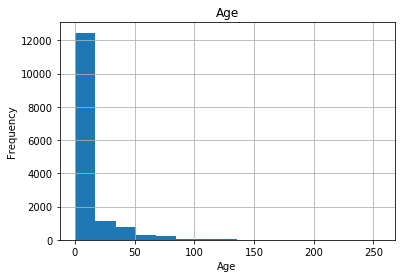

In [20]:
df.hist(column='Age', bins=15)
plt.xlabel("Age")
plt.ylabel("Frequency")

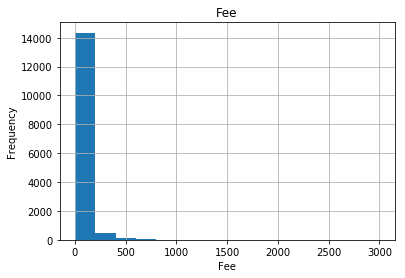

In [21]:
df.hist(column='Fee', bins='auto')

plt.xlabel("Fee")
plt.ylabel("Frequency")

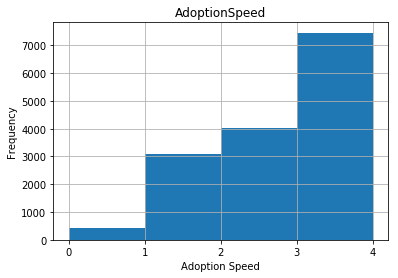

In [22]:
df.hist(column='AdoptionSpeed', bins=4)
plt.xticks(range(0, 5))
plt.xlabel("Adoption Speed")
plt.ylabel("Frequency")


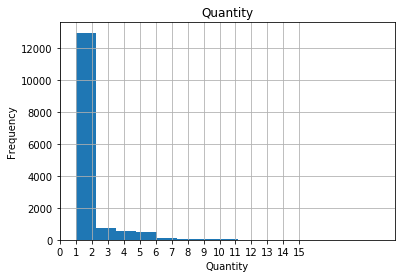

In [23]:
df.hist(column='Quantity', bins=15)
plt.xticks(range(0, 16))
plt.xlabel("Quantity")
plt.ylabel("Frequency")

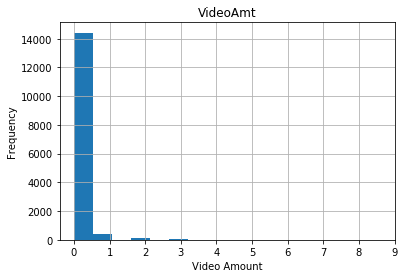

In [24]:
df.hist(column='VideoAmt', bins=15)
plt.xticks(range(0, 10))
plt.xlabel("Video Amount")
plt.ylabel("Frequency")

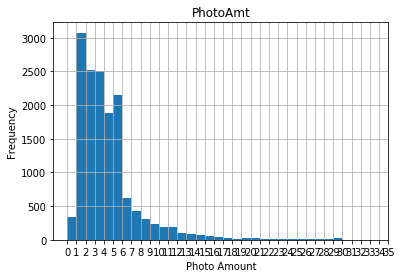

In [25]:
df.hist(column='PhotoAmt', bins=30)
plt.xticks(range(0, 36))
plt.xlabel("Photo Amount")
plt.ylabel("Frequency")